<a href="https://colab.research.google.com/github/ABHISHEK17042003/final-year-project/blob/main/Updated_Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

list Show the current location in the file
h(elp) Show a list of commands, or find help on a specific command
q(uit) Quit the debugger and the program
c(ontinue) Quit the debugger, continue in the program
n(ext) Go to the next step of the program
Repeat the previous command
p(rint) Print variables
s(tep) Step into a subroutine
r(eturn) Return out of a subroutine

#*****Code To Download The Dataset From Kaggel*****


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'emg-signal-for-gesture-recognition:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F756231%2F1306261%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T165802Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7d7c215e91a64ad0cc324c012a796bfe22be0f2bacae07fd1cadde99528b6535531c300dd8c54a9034b14429e2ea24629619b5c8244a64191b41e019c4bb3e44fefa000b5cc0f63c09f5d78d6bad91614264aeb3fb3b1a5206c2d65727715f8a62cb0f86ae704834d61c4f3c0a156d9e37e3dccc986929e6931b48be2c54ca4b2a5105dc596585f1824c9e09a14a63765ac7fbfe643211682760a6a3fb82e450bde68ed5e057d1c28b36e9c50e4ea39f9ec303266007d9fbe34c8a695dd6e2954a93141e224dda5355bc4e67315cc99dba0114f65e081b16e0dfef1522372865f3f0092ca04300db28b7d0d1f0bd097fac72bf3e0a90d09c28210f9788fba404'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


#***Necessary libraries***

In [ ]:
import pandas as pd
import random
import csv
import numpy as np
import pdb

#**Reading EMG Data from CSV**

In [ ]:
project_dataset_dir = '/kaggle/input/emg-signal-for-gesture-recognition/EMG-data.csv'
df = pd.read_csv(project_dataset_dir)        #the CSV file is loaded as 'df'

In [ ]:
df.info()  # Print information about the DataFrame

In [ ]:
df.drop('time', inplace=True, axis=1) # Drop the 'time' column
df.head()  # Print the rows of the DataFrame

In [ ]:
df.info()  # Assuming the CSV file is loaded as 'df' in previous code
len(df)  # Get information about the DataFrame and its length

In [ ]:
df.isna().sum() # Count missing values in each column

In [ ]:
print(df['class'].value_counts())  # Print the counts of unique values in the 'class' column
print(f"Total data Values: {len(df)}")

In [ ]:
df.drop(df[df['class'] == 0].index, inplace=True)   # Remove Rows with Class 0 (In-Place)

In [ ]:
df.head()   # Display the first few rows of the DataFrame

In [ ]:
all_labels_present = df.groupby('class')['label'].nunique() == 36    # use " unquniq() == 36 " to check if all class have 36 unique label
all_labels_present     # Unique labels per class (36 check)

#**Check How Label in Class 7**

In [ ]:
# check how many label in class = 7
class_7_data = df[df['class'] == 7]
class_7_label_counts = class_7_data.groupby('label').size().reset_index(name='count')
class_7_label_counts

In [ ]:
data = df[df['class'] != 7]  # Exclude class-7 data

In [ ]:
data['class'].value_counts() # Remove rows with class-7, class - 0

In [ ]:
subjects_data = data.groupby(['label','class'])   # Categorize data by label and class

In [ ]:
# Assuming you have loaded your dataset into a DataFrame named df
class_counts = data.groupby('class').size().reset_index(name='count')

print('Class distribution:')
print(class_counts)

In [ ]:
data     # print the data form 1 to 36 labels with 6 classes

In [ ]:
from matplotlib import pyplot as plt
data['channel1'].plot(kind='line', figsize=(8, 4), title='channel1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
data['channel2'].plot(kind='line', figsize=(8, 4), title='channel2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.drop('label', inplace=True, axis=1)    #Delete 'label' column from DataFrame

In [ ]:
data.info()

# ***NORMALIZE PROCESS***

In [ ]:
pdb.set_trace()    # debuggere trace
def normalized(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = (data - min_value) / (max_value - min_value)    # formula to normalize the data
    return normalized_data

# ***THE SLIDING WINDOW - CNN1***

In [ ]:
def sliding_window(data, window_size, stride):
    windowed_data = []  # Initialize an empty list to store windowed data
    labels = []  # Initialize an empty list to store corresponding labels

    # Iterate through the data with a sliding window of specified size and stride
    for i in range(0, len(data) - window_size + 1, stride):
        # Extract a window of data excluding the last column (label column) and convert it to a NumPy array
        windowed = data.iloc[i:i+window_size, :-1].values

        # Extract the label from the last column of the current window
        label = data.iloc[i+window_size-1, -1]

        # Append the windowed data and its corresponding label to their respective lists
        windowed_data.append(windowed)
        labels.append(label)

    # Convert the lists of windowed data and labels into NumPy arrays and return them
    return np.array(windowed_data), np.array(labels)


In [ ]:
pdb.set_trace()    # debuggere trace
window_size=150
stride=30
X, Y = sliding_window(data, 150, 30)

In [ ]:
pdb.set_trace()    # debuggere trace
X = normalized(X)

In [ ]:
pdb.set_trace()    # debuggere trace
Y = Y - 1

In [ ]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
pdb.set_trace()    # debuggere trace
# Split the data into training and testing sets, with 80% for training and 20% for testing
# X and Y are assumed to be the feature matrix and target vector, respectively
# random_state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary modules from TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN_model(input_shape, num_classes):
    model = Sequential()  # Create a Sequential model

    # Convolutional layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))  # Add a 1D convolutional layer with 32 filters
    model.add(MaxPooling1D(pool_size=2))  # Add a max pooling layer

    model.add(Conv1D(64, kernel_size=3, activation='relu'))  # Add another 1D convolutional layer with 64 filters
    model.add(MaxPooling1D(pool_size=2))  # Add another max pooling layer

    # Flattening layer
    model.add(Flatten())  # Flatten the output of the convolutional layers

    # Fully connected layers
    model.add(Dense(128, activation='relu'))  # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))  # Add the output layer with softmax activation

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    model.summary()  # Print model summary
    return model  # Return the compiled model


In [ ]:
# Define the CNN model
pdb.set_trace()    # debuggere trace
input_shape = X_train.shape[1:]  # Set the input shape based on the features in the training data
num_classes = len(np.unique(Y))   # Determine the number of classes based on the unique values in the target vector

# Create the CNN model using the defined input shape and number of classes
model = CNN_model(input_shape, num_classes)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [35]:
from sklearn.metrics import accuracy_score, f1_score
pdb.set_trace()    # debuggere trace
# make predictions on training data
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)  # One-hot encoding'den etiketlere dönüştür

# make predictions on test data
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere dönüştür

# calculate accuracy
accuracy_training = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# calculate F1 score
f1_training = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Training Accuracy:", accuracy_training)
print("Test Accuracy:", accuracy_test)
print("Training F1 Score:", f1_training)
print("Test F1 Score:", f1_test)

--Return--
None
> <ipython-input-35-d7629916485d>(2)<cell line: 2>()
      1 from sklearn.metrics import accuracy_score, f1_score
----> 2 pdb.set_trace()    # debuggere trace
      3 # make predictions on training data
      4 y_pred_train = model.predict(X_train)
      5 y_pred_train = np.argmax(y_pred_train, axis=1)  # One-hot encoding'den etiketlere dönüştür

ipdb> model.predict(X_train)
1250/1250 [==============================] - 8s 7ms/step
array([[1.6768845e-10, 1.1590801e-11, 2.7087921e-07, 9.2667252e-01,
        1.5915066e-04, 7.3168062e-02],
       [2.8121291e-05, 7.7156238e-02, 8.2221615e-01, 9.0436921e-02,
        1.0984566e-03, 9.0642339e-03],
       [2.7214407e-03, 9.5458972e-01, 9.9869221e-03, 9.0640700e-05,
        9.2817663e-06, 3.2601811e-02],
       ...,
       [1.5793080e-04, 3.0448806e-01, 4.4397205e-01, 1.1540340e-04,
        1.3866855e-08, 2.5126657e-01],
       [1.2414306e-03, 5.4343487e-04, 9.8366803e-01, 4.1367309e-04,
        3.5668537e-03, 1.0566506e-02],
  

--Return--
None
> <ipython-input-37-a50294e0a297>(4)<cell line: 4>()
      2 import pdb  # Import the Python debugger module
      3 
----> 4 pdb.set_trace()  # Set a breakpoint for debugging
      5 
      6 # Plot training and testing loss graph

ipdb> history.history
{'loss': [0.9954684972763062, 0.6517354249954224, 0.5684111714363098, 0.5211347937583923, 0.4639125466346741, 0.4461253881454468, 0.4084832966327667, 0.3833692669868469, 0.34448763728141785, 0.33205586671829224], 'accuracy': [0.6071151494979858, 0.7575992345809937, 0.7872207164764404, 0.8017062544822693, 0.8230466842651367, 0.8305020928382874, 0.8442120552062988, 0.8553951382637024, 0.867929220199585, 0.8737334609031677], 'val_loss': [0.8141815066337585, 0.8157908916473389, 0.5816624164581299, 0.5183817148208618, 0.5314114689826965, 0.480795681476593, 0.4738001227378845, 0.4731309115886688, 0.4539627432823181, 0.6597468852996826], 'val_accuracy': [0.6822776198387146, 0.706994891166687, 0.783048152923584, 0.8087661266326

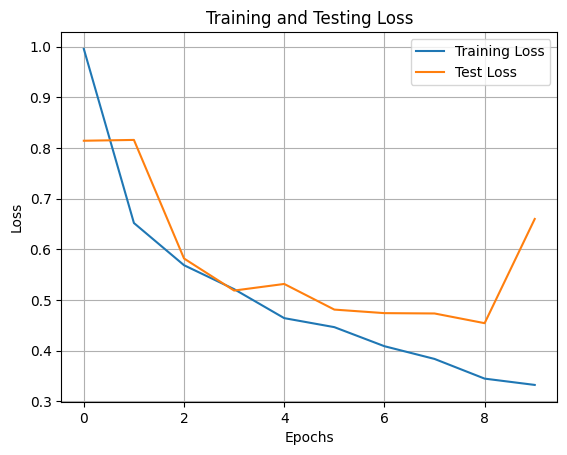

In [37]:
import matplotlib.pyplot as plt
import pdb  # Import the Python debugger module

pdb.set_trace()  # Set a breakpoint for debugging

# Plot training and testing loss graph
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Test Loss')  # Plot testing loss
plt.xlabel('Epochs')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.title('Training and Testing Loss')  # Set the title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines to the plot
plt.show()  # Display the plot


--Return--
None
> <ipython-input-39-86b63c9bd054>(6)<cell line: 6>()
      4 import pdb  # Import the Python debugger module
      5 
----> 6 pdb.set_trace()  # Set a breakpoint for debugging
      7 
      8 # Calculate confusion matrix

ipdb> conf_matrix
*** NameError: name 'conf_matrix' is not defined
ipdb> xticklabels
*** NameError: name 'xticklabels' is not defined
ipdb> y_test
array([1, 2, 0, ..., 1, 2, 2])
ipdb> y_pred_test
array([1, 2, 0, ..., 5, 2, 5])
ipdb> c


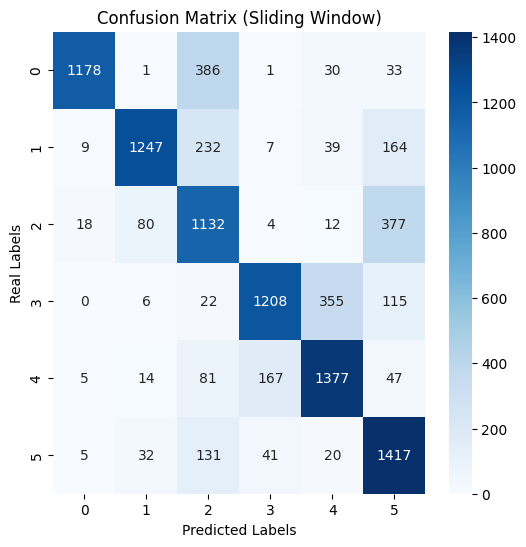

In [39]:
# Import necessary modules
from sklearn.metrics import confusion_matrix  # Import confusion_matrix function from sklearn.metrics
import seaborn as sns  # Import seaborn library for visualization
import pdb  # Import the Python debugger module

pdb.set_trace()  # Set a breakpoint for debugging

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)  # Calculate confusion matrix using predicted and true labels

# Plot confusion matrix
plt.figure(figsize=(6, 6))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Create heatmap of confusion matrix with annotations and blue color map, with x and y labels representing unique class labels
plt.title('Confusion Matrix (Sliding Window)')  # Set the title of the plot
plt.xlabel('Predicted Labels')  # Set the label for the x-axis
plt.ylabel('Real Labels')  # Set the label for the y-axis
plt.show()  # Display the plot


In [41]:
from sklearn.metrics import classification_report
import pdb  # Import the Python debugger module

pdb.set_trace()  # Set a breakpoint for debugging

# Calculate classification report
report = classification_report(y_test, y_pred_test, target_names=[str(label) for label in np.unique(y_test)])

# Print the classification report
print(report)


--Return--
None
> <ipython-input-41-4d80f72bcb78>(4)<cell line: 4>()
      2 import pdb  # Import the Python debugger module
      3 
----> 4 pdb.set_trace()  # Set a breakpoint for debugging
      5 
      6 # Calculate classification report

ipdb> y_test
array([1, 2, 0, ..., 1, 2, 2])
ipdb>  y_pred_test
array([1, 2, 0, ..., 5, 2, 5])
ipdb> report = classification_report(y_test, y_pred_test, target_names=[str(label) for label in np.unique(y_test)])
ipdb> target_names
*** NameError: name 'target_names' is not defined
ipdb> c
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      1629
           1       0.90      0.73      0.81      1698
           2       0.57      0.70      0.63      1623
           3       0.85      0.71      0.77      1706
           4       0.75      0.81      0.78      1691
           5       0.66      0.86      0.75      1646

    accuracy                           0.76      9993
   macro avg       0.78      0.76  



---








---



#***Fourier Transform - CNN2***




In [45]:
import numpy as np
from scipy.fft import fft  # Import FFT (Fast Fourier Transform) function from scipy library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

pdb.set_trace()  # Set a breakpoint for debugging
def fourier_transform(X):
    transformed_data = []  # Initialize an empty list to store transformed data

    # Iterate through each item in the dataset
    for item in X:
        transformed_item = []  # Initialize an empty list to store transformed item

        # Transpose the data to work with each channel separately
        for channel in item.T:
            # Apply FFT (Fast Fourier Transform) to each channel and calculate amplitude
            fft_values = fft(channel)

            # Append amplitude information to the transformed item list
            transformed_item.append(np.abs(fft_values))

        # Convert the transformed item list into a NumPy array and append it to the transformed data list
        transformed_data.append(np.array(transformed_item))

    # Convert the transformed data list into a NumPy array and return
    return np.array(transformed_data)


--Return--
None
> <ipython-input-45-7dbc4d0221a3>(8)<cell line: 8>()
      6 from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
      7 
----> 8 pdb.set_trace()  # Set a breakpoint for debugging
      9 def fourier_transform(X):
     10     transformed_data = []  # Initialize an empty list to store transformed data

ipdb> cc
*** NameError: name 'cc' is not defined
ipdb> c


In [47]:
# apply fourier transform
pdb.set_trace()  # Set a breakpoint for debugging
transformed_X = fourier_transform(X)

--Return--
None
> <ipython-input-47-0b9a94259252>(2)<cell line: 2>()
      1 # apply fourier transform
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 transformed_X = fourier_transform(X)

ipdb> X
array([[[0.49803922, 0.50196078, 0.49803922, ..., 0.49803922,
         0.49803922, 0.50588235],
        [0.49803922, 0.49411765, 0.50196078, ..., 0.49803922,
         0.49019608, 0.49411765],
        [0.49803922, 0.49411765, 0.50196078, ..., 0.49803922,
         0.49019608, 0.49411765],
        ...,
        [0.49411765, 0.50196078, 0.49411765, ..., 0.49803922,
         0.49803922, 0.50588235],
        [0.49019608, 0.48235294, 0.49803922, ..., 0.49803922,
         0.49803922, 0.49803922],
        [0.49019608, 0.48235294, 0.49803922, ..., 0.49803922,
         0.49803922, 0.49803922]],

       [[0.49803922, 0.49803922, 0.49411765, ..., 0.49803922,
         0.49411765, 0.49803922],
        [0.49803922, 0.49803922, 0.49411765, ..., 0.49803922,
         0.49411765, 0.49803922],
  

In [49]:
# Transpose the transformed data to bring the channels dimension to the last axis

pdb.set_trace()  # Set a breakpoint for debugging
transposed_X = np.transpose(transformed_X, (0, 2, 1))


--Return--
None
> <ipython-input-49-6e1bab5b57d8>(3)<cell line: 3>()
      1 # Transpose the transformed data to bring the channels dimension to the last axis
      2 
----> 3 pdb.set_trace()  # Set a breakpoint for debugging
      4 transposed_X = np.transpose(transformed_X, (0, 2, 1))

ipdb> transformed_X
array([[[7.46666667e+01, 2.18562021e-01, 4.24619374e-02, ...,
         5.83416259e-02, 4.24619374e-02, 2.18562021e-01],
        [7.42196078e+01, 2.56217750e-01, 4.04929852e-01, ...,
         1.43904925e-01, 4.04929852e-01, 2.56217750e-01],
        [7.44666667e+01, 7.23422538e-01, 4.85802242e-01, ...,
         4.11527638e-01, 4.85802242e-01, 7.23422538e-01],
        ...,
        [7.48156863e+01, 1.49177724e-01, 2.34330201e-01, ...,
         1.24434113e-01, 2.34330201e-01, 1.49177724e-01],
        [7.49019608e+01, 2.48420649e-01, 1.23094829e-01, ...,
         1.31925262e-01, 1.23094829e-01, 2.48420649e-01],
        [7.48196078e+01, 1.35793198e-01, 2.89353273e-01, ...,
         2.26135

In [53]:
# Split the transformed data into training and testing sets

pdb.set_trace()  # Set a breakpoint for debugging
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(transposed_X, Y, test_size=0.2, random_state=42)


--Return--
None
> <ipython-input-53-c06409010745>(3)<cell line: 3>()
      1 # Split the transformed data into training and testing sets
      2 
----> 3 pdb.set_trace()  # Set a breakpoint for debugging
      4 X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(transposed_X, Y, test_size=0.2, random_state=42)

ipdb> train_test_split
<function train_test_split at 0x7dfdab013490>
ipdb> Y
array([0, 0, 0, ..., 5, 5, 5])
ipdb> transposed_X
array([[[7.46666667e+01, 7.42196078e+01, 7.44666667e+01, ...,
         7.48156863e+01, 7.49019608e+01, 7.48196078e+01],
        [2.18562021e-01, 2.56217750e-01, 7.23422538e-01, ...,
         1.49177724e-01, 2.48420649e-01, 1.35793198e-01],
        [4.24619374e-02, 4.04929852e-01, 4.85802242e-01, ...,
         2.34330201e-01, 1.23094829e-01, 2.89353273e-01],
        ...,
        [5.83416259e-02, 1.43904925e-01, 4.11527638e-01, ...,
         1.24434113e-01, 1.31925262e-01, 2.26135616e-01],
        [4.24619374e-02, 4.04929852e-01, 4.85802242e-0

In [54]:
# Define CNN model
pdb.set_trace()  # Set a breakpoint for debugging
input_shape = X_train_ft.shape[1:]  # Determine input shape based on transformed data
num_classes = len(np.unique(Y))   # Determine the number of classes based on unique values in the target vector

# Create CNN model using the determined input shape and number of classes
model_ft = CNN_model(input_shape, num_classes)


--Return--
None
> <ipython-input-54-8b93abec2ef3>(2)<cell line: 2>()
      1 # Define CNN model
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 input_shape = X_train_ft.shape[1:]  # Determine input shape based on transformed data
      4 num_classes = len(np.unique(Y))   # Determine the number of classes based on unique values in the target vector
      5 

ipdb> X_train_ft
array([[[75.18823529, 75.07058824, 75.48627451, ..., 56.51372549,
         70.82745098, 75.16078431],
        [ 1.07017284,  0.98949651,  1.09555489, ..., 10.07125687,
          3.32044611,  0.62826559],
        [ 1.45868687,  0.4105095 ,  0.78586502, ..., 13.77989908,
          1.72713401,  2.15827124],
        ...,
        [ 0.68355805,  0.86812561,  1.57849972, ...,  3.40079646,
          1.75241488,  2.78489233],
        [ 1.45868687,  0.4105095 ,  0.78586502, ..., 13.77989908,
          1.72713401,  2.15827124],
        [ 1.07017284,  0.98949651,  1.09555489, ..., 10.07125687,
          3.3204

In [56]:
# Train the CNN model on the transformed training data for 10 epochs, using the transformed validation data for evaluation
pdb.set_trace()  # Set a breakpoint for debugging
history_ft = model_ft.fit(X_train_ft, y_train_ft, epochs=10, validation_data=(X_test_ft, y_test_ft))


--Return--
None
> <ipython-input-56-c91f384c742c>(2)<cell line: 2>()
      1 # Train the CNN model on the transformed training data for 10 epochs, using the transformed validation data for evaluation
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 history_ft = model_ft.fit(X_train_ft, y_train_ft, epochs=10, validation_data=(X_test_ft, y_test_ft))

array([[[75.18823529, 75.07058824, 75.48627451, ..., 56.51372549,
         70.82745098, 75.16078431],
        [ 1.07017284,  0.98949651,  1.09555489, ..., 10.07125687,
          3.32044611,  0.62826559],
        [ 1.45868687,  0.4105095 ,  0.78586502, ..., 13.77989908,
          1.72713401,  2.15827124],
        ...,
        [ 0.68355805,  0.86812561,  1.57849972, ...,  3.40079646,
          1.75241488,  2.78489233],
        [ 1.45868687,  0.4105095 ,  0.78586502, ..., 13.77989908,
          1.72713401,  2.15827124],
        [ 1.07017284,  0.98949651,  1.09555489, ..., 10.07125687,
          3.32044611,  0.62826559]],

     

In [57]:
from sklearn.metrics import accuracy_score, f1_score

pdb.set_trace()  # Set a breakpoint for debugging
# Make predictions on training data
y_pred_train_ft = model_ft.predict(X_train_ft)
y_pred_train_ft = np.argmax(y_pred_train_ft, axis=1)  # Convert predictions from one-hot encoding to class labels

# Make predictions on test data
y_pred_test_ft = model_ft.predict(X_test_ft)
y_pred_test_ft = np.argmax(y_pred_test_ft, axis=1)  # Convert predictions from one-hot encoding to class labels

# Calculate accuracy
accuracy_training_ft = accuracy_score(y_train_ft, y_pred_train_ft)  # Calculate accuracy on training data
accuracy_test_ft= accuracy_score(y_test_ft, y_pred_test_ft)  # Calculate accuracy on test data

# Calculate F1 score
f1_training_ft = f1_score(y_train_ft, y_pred_train_ft, average='weighted')  # Calculate F1 score on training data
f1_test_ft = f1_score(y_test_ft, y_pred_test_ft, average='weighted')  # Calculate F1 score on test data

# Print accuracy and F1 score
print("Training Accuracy FT:", accuracy_training_ft)  # Print training accuracy
print("Test Accuracy FT:", accuracy_test_ft)  # Print test accuracy
print("Training F1 Score FT:", f1_training_ft)  # Print training F1 score
print("Test F1 Score FT:", f1_test_ft)  # Print test F1 score


--Return--
None
> <ipython-input-57-231fb8168226>(3)<cell line: 3>()
      1 from sklearn.metrics import accuracy_score, f1_score
      2 
----> 3 pdb.set_trace()  # Set a breakpoint for debugging
      4 # Make predictions on training data
      5 y_pred_train_ft = model_ft.predict(X_train_ft)

ipdb> X_test_ft
array([[[8.08117647e+01, 7.53568627e+01, 7.34980392e+01, ...,
         7.95921569e+01, 7.48745098e+01, 7.82705882e+01],
        [2.02781593e+00, 5.56046189e-01, 1.85804942e+00, ...,
         1.11515700e+01, 1.29822947e+01, 2.14942372e+00],
        [2.63529675e+00, 3.41546781e-01, 2.89897688e-01, ...,
         3.58270647e+00, 7.24101373e+00, 1.02390456e+00],
        ...,
        [1.03740764e+00, 5.34686270e-01, 1.24111327e+00, ...,
         6.61745779e+00, 4.62831239e+00, 2.02964007e+00],
        [2.63529675e+00, 3.41546781e-01, 2.89897688e-01, ...,
         3.58270647e+00, 7.24101373e+00, 1.02390456e+00],
        [2.02781593e+00, 5.56046189e-01, 1.85804942e+00, ...,
         1.1

--Return--
None
> <ipython-input-60-a49f780c9a14>(3)<cell line: 3>()
      1 from sklearn.metrics import confusion_matrix
      2 import seaborn as sns
----> 3 pdb.set_trace()  # Set a breakpoint for debugging
      4 # Generate confusion matrix
      5 cm_ft = confusion_matrix(y_test, y_pred_test_ft)

ipdb> y_test,y_pred_test_ft
(array([1, 2, 0, ..., 1, 2, 2]), array([1, 2, 0, ..., 1, 2, 2]))
ipdb> c


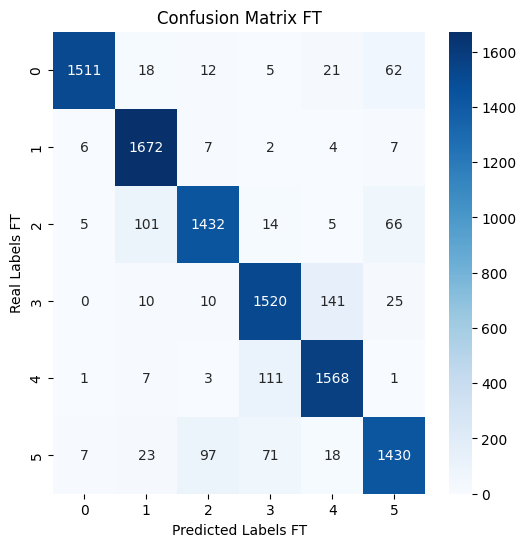

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pdb.set_trace()  # Set a breakpoint for debugging
# Generate confusion matrix
cm_ft = confusion_matrix(y_test, y_pred_test_ft)

# Plot confusion matrix
plt.figure(figsize=(6, 6))  # Set the figure size
sns.heatmap(cm_ft, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Create heatmap of confusion matrix with annotations and blue color map, with x and y labels representing unique class labels
plt.title('Confusion Matrix FT')  # Set the title of the plot
plt.xlabel('Predicted Labels FT')  # Set the label for the x-axis
plt.ylabel('Real Labels FT')  # Set the label for the y-axis
plt.show()  # Display the plot


In [63]:
from sklearn.metrics import classification_report
pdb.set_trace()  # Set a breakpoint for debugging
# Generate classification report including accuracy and F1 score for each class
report_ft = classification_report(y_test, y_pred_test_ft, target_names=[str(label) for label in np.unique(y_test)])

# Print the classification report
print(report_ft)


--Return--
None
> <ipython-input-63-845a60ba4f8b>(2)<cell line: 2>()
      1 from sklearn.metrics import classification_report
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 # Generate classification report including accuracy and F1 score for each class
      4 report_ft = classification_report(y_test, y_pred_test_ft, target_names=[str(label) for label in np.unique(y_test)])
      5 

ipdb> y_test,y_pred_test_ft
(array([1, 2, 0, ..., 1, 2, 2]), array([1, 2, 0, ..., 1, 2, 2]))
ipdb> c
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1629
           1       0.91      0.98      0.95      1698
           2       0.92      0.88      0.90      1623
           3       0.88      0.89      0.89      1706
           4       0.89      0.93      0.91      1691
           5       0.90      0.87      0.88      1646

    accuracy                           0.91      9993
   macro avg       0.92      0.91      0.91      9993
weig

# ***Root Mean Square (RMS) - CNN3***

In [70]:
# Set a breakpoint for debugging
pdb.set_trace()

# Print the shape of X
print(X.shape)


--Return--
None
> <ipython-input-70-0f35d71973ea>(2)<cell line: 2>()
      1 # Set a breakpoint for debugging
----> 2 pdb.set_trace()
      3 
      4 # Print the shape of X
      5 print(X.shape)

ipdb> 
ipdb> c
(49964, 150, 8)


In [71]:
import numpy as np
pdb.set_trace()  # Set a breakpoint for debugging

# Apply Root Mean Square (RMS) calculation across each sample in X
rms_data = np.sqrt(np.mean(np.square(X), axis=1))
c

--Return--
None
> <ipython-input-71-623ad5eec349>(2)<cell line: 2>()
      1 import numpy as np
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 
      4 # Apply Root Mean Square (RMS) calculation across each sample in X
      5 rms_data = np.sqrt(np.mean(np.square(X), axis=1))

ipdb> X
array([[[0.49803922, 0.50196078, 0.49803922, ..., 0.49803922,
         0.49803922, 0.50588235],
        [0.49803922, 0.49411765, 0.50196078, ..., 0.49803922,
         0.49019608, 0.49411765],
        [0.49803922, 0.49411765, 0.50196078, ..., 0.49803922,
         0.49019608, 0.49411765],
        ...,
        [0.49411765, 0.50196078, 0.49411765, ..., 0.49803922,
         0.49803922, 0.50588235],
        [0.49019608, 0.48235294, 0.49803922, ..., 0.49803922,
         0.49803922, 0.49803922],
        [0.49019608, 0.48235294, 0.49803922, ..., 0.49803922,
         0.49803922, 0.49803922]],

       [[0.49803922, 0.49803922, 0.49411765, ..., 0.49803922,
         0.49411765, 0.49803922],
        

In [73]:
# Print the shape of rms_data
print(rms_data.shape)


(49964, 8)


In [75]:
# making data three-dimensional
rms_data = np.expand_dims(rms_data, axis=-1)
print(rms_data)

[[[[0.4977911 ]]

  [[0.49485183]]

  [[0.49656774]]

  ...

  [[0.49878509]]

  [[0.49936789]]

  [[0.49881747]]]


 [[[0.49643961]]

  [[0.49299156]]

  [[0.49582866]]

  ...

  [[0.49925969]]

  [[0.49899327]]

  [[0.49844963]]]


 [[[0.49612973]]

  [[0.49586309]]

  [[0.4974528 ]]

  ...

  [[0.49897098]]

  [[0.49974644]]

  [[0.4984775 ]]]


 ...


 [[[0.49993802]]

  [[0.50007366]]

  [[0.49504633]]

  ...

  [[0.50304642]]

  [[0.50330793]]

  [[0.50585469]]]


 [[[0.50287509]]

  [[0.49837136]]

  [[0.49400341]]

  ...

  [[0.4972214 ]]

  [[0.50837316]]

  [[0.49617778]]]


 [[[0.52192351]]

  [[0.4972447 ]]

  [[0.49365753]]

  ...

  [[0.48658529]]

  [[0.5018943 ]]

  [[0.49894468]]]]


In [76]:
# Print the shape of rms_data
print(rms_data.shape)


(49964, 8, 1, 1)


In [78]:
# Check the shape of the original data and the data after RMS processing
print("Original shape:", X.shape)
print("Shape After RMS Processing:", rms_data.shape)


Original shape: (49964, 150, 8)
Shape After RMS Processing: (49964, 8, 1, 1)


In [80]:
# Split the data into training and testing sets after RMS processing
pdb.set_trace()  # Set a breakpoint for debugging
X_train_rms, X_test_rms, y_train_rms, y_test_rms = train_test_split(rms_data, Y, test_size=0.2, random_state=42)


--Return--
None
> <ipython-input-80-26b17ea8997a>(2)<cell line: 2>()
      1 # Split the data into training and testing sets after RMS processing
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 X_train_rms, X_test_rms, y_train_rms, y_test_rms = train_test_split(rms_data, Y, test_size=0.2, random_state=42)

ipdb> rms_data,Y
(array([[[[0.4977911 ]],

        [[0.49485183]],

        [[0.49656774]],

        ...,

        [[0.49878509]],

        [[0.49936789]],

        [[0.49881747]]],


       [[[0.49643961]],

        [[0.49299156]],

        [[0.49582866]],

        ...,

        [[0.49925969]],

        [[0.49899327]],

        [[0.49844963]]],


       [[[0.49612973]],

        [[0.49586309]],

        [[0.4974528 ]],

        ...,

        [[0.49897098]],

        [[0.49974644]],

        [[0.4984775 ]]],


       ...,


       [[[0.49993802]],

        [[0.50007366]],

        [[0.49504633]],

        ...,

        [[0.50304642]],

        [[0.50330793]],

     

In [82]:
from tensorflow.keras.models import Sequential  # Import Sequential model from TensorFlow Keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense  # Import necessary layers from TensorFlow Keras
pdb.set_trace()  # Set a breakpoint for debugging

def CNN_model_rms(input_shape, num_classes):
    model = Sequential()  # Create a Sequential model

    # Convolutional Layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))  # Add a 1D convolutional layer with 32 filters and ReLU activation
    model.add(MaxPooling1D(pool_size=2))  # Add a max pooling layer

    model.add(Conv1D(64, kernel_size=3, activation='relu'))  # Add another 1D convolutional layer with 64 filters and ReLU activation
    model.add(MaxPooling1D(pool_size=1))  # Add another max pooling layer

    # Flattening Layer
    model.add(Flatten())  # Flatten the output of the convolutional layers

    # Fully Connected Layers
    model.add(Dense(128, activation='relu'))  # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(num_classes, activation='softmax'))  # Add the output layer with softmax activation

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric

    # Print model summary
    model.summary()  # Print model summary

    return model  # Return the compiled model


--Return--
None
> <ipython-input-82-2efcec9e9376>(3)<cell line: 3>()
      1 from tensorflow.keras.models import Sequential  # Import Sequential model from TensorFlow Keras
      2 from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense  # Import necessary layers from TensorFlow Keras
----> 3 pdb.set_trace()  # Set a breakpoint for debugging
      4 
      5 def CNN_model_rms(input_shape, num_classes):

ipdb> model.summary
<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7dfd95d87d90>>
ipdb> c


In [84]:
# Print the shape of X_train_rms
print(X_train_rms.shape)


(39971, 8, 1, 1)


In [89]:
# Define CNN model
input_shape_rms = X_train_rms.shape[1:]  # Determine input shape based on the processed data with RMS
num_classes_rms = len(np.unique(Y))   # Determine the number of classes based on unique values in the target vector

# Adjust input shape to match the expected format for Conv1D layer
input_shape_rms = (input_shape_rms[0], 1)  # Convert input shape to (input_shape[0], 1)

# Create CNN model using the adjusted input shape and number of classes
model_rms = CNN_model_rms(input_shape_rms, num_classes_rms)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 6, 32)             128       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 3, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 64)             6208      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [90]:
# Train the CNN model on the data processed with RMS for 10 epochs, using the RMS processed validation data for evaluation
history_rms = model_rms.fit(X_train_rms, y_train_rms, epochs=10, validation_data=(X_test_rms, y_test_rms))


Epoch 1/10
1250/1250 [==============================] - 9s 5ms/step - loss: 1.6637 - accuracy: 0.2930 - val_loss: 1.4730 - val_accuracy: 0.4017
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.3613 - accuracy: 0.4640 - val_loss: 1.2959 - val_accuracy: 0.5178
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2558 - accuracy: 0.5154 - val_loss: 1.2972 - val_accuracy: 0.5192
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2050 - accuracy: 0.5379 - val_loss: 1.2369 - val_accuracy: 0.5191
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1753 - accuracy: 0.5498 - val_loss: 1.1510 - val_accuracy: 0.5612
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.1587 - accuracy: 0.5570 - val_loss: 1.1424 - val_accuracy: 0.5600
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1375 - accuracy: 0.5637 - val_loss: 1.1627 - val_accuracy:

In [91]:
from sklearn.metrics import accuracy_score, f1_score  # Import necessary metrics

# Predict on training data
y_pred_train_rms = model_rms.predict(X_train_rms)  # Make predictions on training data
y_pred_train_rms = np.argmax(y_pred_train_rms, axis=1)  # Convert predictions from one-hot encoding to class labels

# Predict on test data
y_pred_test_rms = model_rms.predict(X_test_rms)  # Make predictions on test data
y_pred_test_rms = np.argmax(y_pred_test_rms, axis=1)  # Convert predictions from one-hot encoding to class labels

# Calculate accuracy
accuracy_training_rms = accuracy_score(y_train_rms, y_pred_train_rms)  # Calculate accuracy on training data
accuracy_test_rms = accuracy_score(y_test_rms, y_pred_test_rms)  # Calculate accuracy on test data

# Calculate F1 score
f1_training_rms = f1_score(y_train_rms, y_pred_train_rms, average='weighted')  # Calculate F1 score on training data
f1_test_rms = f1_score(y_test_rms, y_pred_test_rms, average='weighted')  # Calculate F1 score on test data

# Print accuracy and F1 score
print("Training Accuracy RMS:", accuracy_training_rms)  # Print training accuracy
print("Test Accuracy RMS:", accuracy_test_rms)  # Print test accuracy
print("Training F1 Score RMS:", f1_training_rms)  # Print training F1 score
print("Test F1 Score RMS:", f1_test_rms)  # Print test F1 score


313/313 [==============================] - 0s 1ms/step
Training Accuracy RMS: 0.5953816516974807
Test Accuracy RMS: 0.5963174221955369
Training F1 Score RMS: 0.5946537842956922
Test F1 Score RMS: 0.5951899386193479


In [93]:
from sklearn.metrics import classification_report  # Import classification_report function
pdb.set_trace()  # Set a breakpoint for debugging
# Generate classification report including accuracy and F1 score for each class
report_rms = classification_report(y_test, y_pred_test_rms, target_names=[str(label) for label in np.unique(y_test)])

# Print the classification report
print(report_rms)


--Return--
None
> <ipython-input-93-62ec410f7150>(2)<cell line: 2>()
      1 from sklearn.metrics import classification_report  # Import classification_report function
----> 2 pdb.set_trace()  # Set a breakpoint for debugging
      3 # Generate classification report including accuracy and F1 score for each class
      4 report_rms = classification_report(y_test, y_pred_test_rms, target_names=[str(label) for label in np.unique(y_test)])
      5 

ipdb> y_test, y_pred_test_rms
(array([1, 2, 0, ..., 1, 2, 2]), array([2, 2, 0, ..., 3, 2, 2]))
ipdb> c
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1629
           1       0.58      0.53      0.56      1698
           2       0.57      0.56      0.57      1623
           3       0.57      0.62      0.59      1706
           4       0.52      0.50      0.51      1691
           5       0.52      0.54      0.53      1646

    accuracy                           0.60      9993
   macro avg 

--Return--
None
> <ipython-input-94-aecded60412f>(3)<cell line: 3>()
      1 from sklearn.metrics import confusion_matrix  # Import confusion_matrix function
      2 import seaborn as sns  # Import seaborn library for visualization
----> 3 pdb.set_trace()  # Set a breakpoint for debugging
      4 # Generate confusion matrix
      5 cm_rms = confusion_matrix(y_test, y_pred_test_rms)

ipdb> y_test, y_pred_test_rms
(array([1, 2, 0, ..., 1, 2, 2]), array([2, 2, 0, ..., 3, 2, 2]))
ipdb> cm_rms
*** NameError: name 'cm_rms' is not defined
ipdb> c


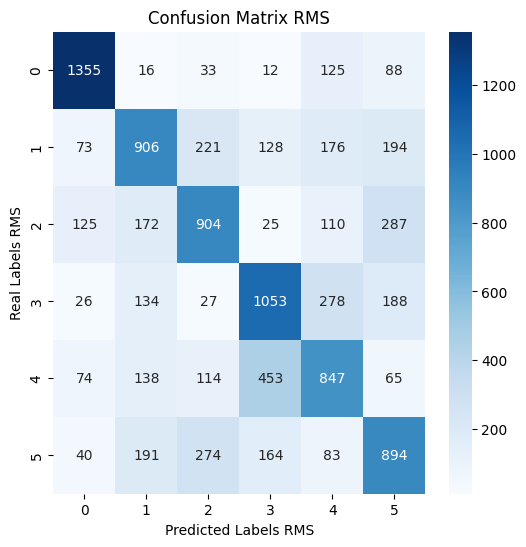

In [94]:
from sklearn.metrics import confusion_matrix  # Import confusion_matrix function
import seaborn as sns  # Import seaborn library for visualization
pdb.set_trace()  # Set a breakpoint for debugging
# Generate confusion matrix
cm_rms = confusion_matrix(y_test, y_pred_test_rms)

# Plot confusion matrix
plt.figure(figsize=(6, 6))  # Set the figure size
sns.heatmap(cm_rms, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# Create heatmap of confusion matrix with annotations and blue color map, with x and y labels representing unique class labels
plt.title('Confusion Matrix RMS')  # Set the title of the plot
plt.xlabel('Predicted Labels RMS')  # Set the label for the x-axis
plt.ylabel('Real Labels RMS')  # Set the label for the y-axis
plt.show()  # Display the plot
